#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   José Fabricio Barahona Amaya Matrícula # A01792950
*   Giovanni Andrés Acuña Morales Mtrícula # 
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [36]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import zipfile as zf
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import  cross_validate,RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import cross_val_score 
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#**Ejercicio-1.** 

1. Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como
se indica en la página de la UCI.
NOTA: Si lo deseas, puedes traducirlos y ponerlas en español. 

In [2]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip
result = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip")
names = ["status", "duration", "credit_history", "purpose", "amount", 
                "savings", "employment_duration", "installment_rate",
                "personal_status_sex", "other_debtors",
                "present_residence", "property",
                "age", "other_installment_plans",
                "housing", "number_credits",
                "job", "people_liable", "telephone", "foreign_worker",
                "credit_risk"]
file_like_object = io.BytesIO(result.content)
z = zf.ZipFile(file_like_object)
with z.open("SouthGermanCredit.asc") as f:
  creditData = pd.read_csv(f, header=0, delimiter=" ")
  creditData = creditData.set_axis(names, axis=1, inplace=False)
  print(creditData.head())    # print the first 5 rows

   status  duration  credit_history  purpose  amount  savings  \
0       1        18               4        2    1049        1   
1       1         9               4        0    2799        1   
2       2        12               2        9     841        2   
3       1        12               4        0    2122        1   
4       1        12               4        0    2171        1   

   employment_duration  installment_rate  personal_status_sex  other_debtors  \
0                    2                 4                    2              1   
1                    3                 2                    3              1   
2                    4                 2                    2              1   
3                    3                 3                    3              1   
4                    3                 4                    3              1   

   ...  property  age  other_installment_plans  housing  number_credits  job  \
0  ...         2   21                        3  

In [3]:
y=creditData.iloc[:,-1]
X=creditData.iloc[:,0:-1]


#**Ejercicio-2.**

 Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 
15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es 
necesario en este paso generar el conjunto de validación. Define como la variable X a todas las 
variables de entrada y a la variable Y como la variable de salida. 

Column name: laufkont
Variable name: status
Content: status of the debtor's checking account with the bank (categorical)

Column name: laufzeit
Variable name: duration
Content: credit duration in months (quantitative)

Column name: moral
Variable name: credit_history
Content: history of compliance with previous or concurrent credit contracts (categorical)

Column name: verw
Variable name: purpose
Content: purpose for which the credit is needed (categorical)

Column name: hoehe
Variable name: amount
Content: credit amount in DM (quantitative; result of monotonic transformation; actual data and type of
transformation unknown)

Column name: sparkont
Variable name: savings
Content: debtor's savings (categorical)

Column name: beszeit
Variable name: employment_duration
Content: duration of debtor's employment with current employer (ordinal; discretized quantitative)

Column name: rate
Variable name: installment_rate
Content: credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative)

Column name: famges
Variable name: personal_status_sex
Content: combined information on sex and marital status; categorical; sex cannot be recovered from the
variable, because male singles and female non-singles are coded with the same code (2); female widows cannot
be easily classified, because the code table does not list them in any of the female categories

Column name: buerge
Variable name: other_debtors
Content: Is there another debtor or a guarantor for the credit? (categorical)

Column name: wohnzeit
Variable name: present_residence
Content: length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative)

Column name: verm
Variable name: property
Content: the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3
or 4 are not applicable and there is a car or any other relevant property that does not fall under variable
sparkont. (ordinal)

Column name: alter
Variable name: age
Content: age in years (quantitative)

Column name: weitkred
Variable name: other_installment_plans
Content: installment plans from providers other than the credit-giving bank (categorical)

Column name: wohn
Variable name: housing
Content: type of housing the debtor lives in (categorical)

Column name: bishkred
Variable name: number_credits
Content: number of credits including the current one the debtor has (or had) at this bank (ordinal, discretized
quantitative); contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available.

Column name: beruf
Variable name: job
Content: quality of debtor's job (ordinal)

Column name: pers
Variable name: people_liable
Content: number of persons who financially depend on the debtor (i.e., are entitled to maintenance) (binary,
discretized quantitative)

Column name: telef
Variable name: telephone
Content: Is there a telephone landline registered on the debtor's name? (binary; remember that the data are
from the 1970s)

Column name: gastarb
Variable name: foreign_worker
Content: Is the debtor a foreign worker? (binary)

Column name: kredit
Variable name: credit_risk
Content: Has the credit contract been complied with (good) or not (bad) ? (binary)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)
X.people_liable.value_counts()

2    845
1    155
Name: people_liable, dtype: int64

In [5]:
status = ["no checking account",
                         "... < 0 DM",
                         "0<= ... < 200 DM",
                         "... >= 200 DM / salary for at least 1 year"]

credit_history = [ "delay in paying off in the past",
  "critical account/other credits elsewhere",
  "no credits taken/all credits paid back duly",
  "existing credits paid back duly till now",
  "all credits at this bank paid back duly"]
purpose = [
  "others",
  "car (new)",
  "car (used)",
  "furniture/equipment",
  "radio/television",
  "domestic appliances",
  "repairs",
  "education", 
  "vacation",
  "retraining",
  "business"]
other_debtors=[
  "none",
  "co-applicant",
  "guarantor"]
personal_status_sex = [
  "male : divorced/separated",
  "female : non-single or male : single",
  "male : married/widowed",
  "female : single"]
other_installment_plans=[
  "bank",
  "stores",
  "none"]
housing=["for free", "rent", "own"]
telephone =["no", "yes (under customer name)"]
foreign_worker =["yes", "no"]
savings =["unknown/no savings account",
                         "... <  100 DM", 
                         "100 <= ... <  500 DM",
                         "500 <= ... < 1000 DM", 
                         "... >= 1000 DM"]
X.dtypes
categorical_columns = ["status", "credit_history","savings", "purpose", "other_debtors","personal_status_sex","other_installment_plans","housing","telephone","people_liable","foreign_worker"]
numerical_columns = ["duration", "amount","age"]
ordinal_columns=[ "employment_duration", "installment_rate", "present_residence","property","job","number_credits"]

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
X[numerical_columns].describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


#**Ejercicio-3.**
3.  Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas 
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de 
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal 
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha 
información realiza un Pipeline que incluya al menos las siguientes transformaciones: 
a.  Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable 
(decide y justifica que tipo de imputación realizas en cada caso). 
b.  Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una 
transformación que escale a todas ellas en un rango equiparable. 
c.  Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y 
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique  la 
transformación one-hot encoding. Por el momento dejar las variables ordinales sin 
transformar. 

In [14]:
from pandas.core.arrays import categorical
#Definir las variables categórica (categorical), ordinal, (discretized quantitative), numérica (quantitative) y binaria (binary)...

#Columnas categoricas
df_cate = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing','telephone']
#columnas ordinales 
df_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
#columnas numericas 
df_num = ['duration','amount','age']
#columnas binarias
df_bin = ['people_liable','telephone','foreign_worker']


In [15]:

#Verificar datos nulos
X_train.isnull().sum()


status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [18]:
#3b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica unatransformación que escale a todas ellas en un rango equiparable.
#El metodo equiparable es el maxmin escaler

df_num_pip= Pipeline(steps = [('impMean', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(1,2)))])

columnas_a_aplicar_df_num_pip = df_num 

df_cate_pip = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_a_aplicar_df_num_cate = df_cate

df_bin_pip = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_a_aplicar_df_nbin_pip = df_bin


In [19]:
#Pasamos al 3.c
#Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.

Col_Trans = ColumnTransformer(transformers=[('numericas', df_num_pip, columnas_a_aplicar_df_num_pip), 
                                            ('categoricas', df_cate_pip, columnas_a_aplicar_df_num_cate), 
                                            ('binarias', df_bin_pip, columnas_a_aplicar_df_nbin_pip)], 
                                            remainder='passthrough')

#Ver las trasnformaciones y analizar lo que que necesitamos
X_train_fit = Col_Trans.fit(X_train)
pd.DataFrame(X_train_fit.transform(X_train))


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.029412,1.064064,1.303571,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,4.0,4.0,2.0,1.0,4.0
1,1.382353,1.260796,1.125000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0
2,1.205882,1.194138,1.250000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,1.0,4.0,3.0,2.0,3.0
3,1.117647,1.106536,1.178571,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,3.0,4.0,4.0,2.0,1.0,3.0
4,1.294118,1.400013,1.446429,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,5.0,2.0,4.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1.088235,1.082415,1.214286,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,3.0,4.0,2.0,3.0,1.0,2.0
846,1.029412,1.106860,1.267857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0
847,1.073529,1.076968,1.178571,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,4.0,2.0,3.0,4.0,1.0,3.0
848,1.294118,1.109584,1.732143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,5.0,4.0,4.0,1.0,1.0,3.0


In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_columns),
        ("cat", categorical_transformer, categorical_columns),
    ]
)

#**Ejercicio-4.**

Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de
aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás
llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda
aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las
siguientes características:

a. Usa los parámetros predeterminados de cada modelo.

b. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision,
recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes
definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn.
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix()
de scikit-learn para definir las métricas).

c. Usar validación cruzada estratificada con 

5 particiones y con 3 repeticiones.

d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como
para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la
métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu
respuesta.

e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de
estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:

i. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando
el tamaño de la muestra para el modelo de regresión Logística con su
hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de
los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del
desempeño de dicha función “learning_curve()”.

ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando
la complejidad del hiperparámetro “max_depth” para el modelo de árbol de
decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima 

In [32]:
def mi_gmean(yreal, ypred):
     cm = (confusion_matrix(yreal, ypred))     
     gmean = np.sqrt(((cm[1,1])/(cm[1,1]+cm[1,0]))*((cm[0,0])/(cm[0,0]+cm[0,1])))
     return gmean
def mi_accuracy(yreal, ypred):
     cm = (confusion_matrix(yreal, ypred))     
     accuracy = (cm[0,0]+cm[1,1])/cm.sum()
     return accuracy
def mi_precision(yreal, ypred):
     cm = (confusion_matrix(yreal, ypred))     
     precision = (cm[1,1])/cm[:,1].sum()
     return precision
def mi_recall(yreal, ypred):
     cm = (confusion_matrix(yreal, ypred))     
     recall = (cm[1,1])/cm[1:].sum()
     return recall
def mi_f1_score (yreal,ypred):
  recall=mi_recall(yreal,ypred)
  precision=mi_precision(yreal,ypred)
  return 2*(recall * precision) / (recall + precision)
def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  group_names = ['Verdaderos Negativos\nVN','Falsos Positivos\nFP','Falsos Negativos\nFN','Verdaderos Positivos\nVP']
  group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt='',cmap='Spectral')

def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,scorer):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(scorer)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()
def mi_ValidationCurvePlot(train_sizes, train_scores, val_scores, scorer):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Validación incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(scorer)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

Random Forest
RF train accuracy: 1.000
RF test accuracy: 0.767
Random Forest:
mean Accuracy: 0.751 (0.0245)
mean Precision: 0.784 (0.0183)
mean Recall: 0.890 (0.0236)
f-1 Score: 0.834 (0.0164)
Gmean: 0.616 (0.0435)

Random Forest Random-Oversampling:
mean Accuracy: 0.743 (0.0191)
mean Precision: 0.808 (0.0214)
mean Recall: 0.831 (0.0298)
f-1 Score: 0.819 (0.0140)
Gmean: 0.666 (0.0397)

Random Forest Tomek-links:
mean Accuracy: 0.737 (0.0156)
mean Precision: 0.794 (0.0137)
mean Recall: 0.843 (0.0237)
f-1 Score: 0.818 (0.0118)
Gmean: 0.641 (0.0283)

Random Forest SMOTE:
mean Accuracy: 0.729 (0.0194)
mean Precision: 0.814 (0.0185)
mean Recall: 0.795 (0.0266)
f-1 Score: 0.804 (0.0152)
Gmean: 0.675 (0.0307)

Random Forest SMOTEEN:
mean Accuracy: 0.702 (0.0358)
mean Precision: 0.836 (0.0304)
mean Recall: 0.715 (0.0472)
f-1 Score: 0.770 (0.0320)
Gmean: 0.691 (0.0409)

Regresión Logística
RF train accuracy: 0.781
RF test accuracy: 0.740
Regresión Logística:
mean Accuracy: 0.752 (0.0197)
mean P

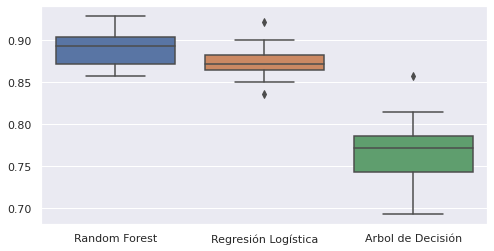

In [29]:
def get_models_underoversampling():
  modelos, nombres = list(), list()

  # técnica y nombre: RandOver
  modelos.append(RandomOverSampler())
  nombres.append('Random-Oversampling')
  # técnica y nombre: TomekLinks
  modelos.append(TomekLinks())
  nombres.append('Tomek-links')
  # técnica y nombre: SMOTE
  modelos.append(SMOTE())
  nombres.append('SMOTE')
  # técnica y nombre: SMOTEENN
  modelos.append(SMOTEENN())
  nombres.append('SMOTEEN')

  return modelos, nombres



model = [RandomForestClassifier(),
          LogisticRegression(), tree.DecisionTreeClassifier()]
pipes = []
modelosOU,nombresOU = get_models_underoversampling()
Results = [] 
nombres = ["Random Forest", "Regresión Logística","Arbol de Decisión"]
for i in range(len(model)):         
  rf = Pipeline(
    [
        ("preprocess", preprocessor),
        ("classifier", model[i]),
    ]
  )
  pipes.append(rf)
  print(nombres[i])
  rf.fit(X_train, y_train)
  print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
  print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")
  yhat  = rf.predict(X_test)
 # mi_cm(y_test,yhat)
  mismetricas = {'accuracy':make_scorer(mi_accuracy),'precision':make_scorer(mi_precision)
  ,'recall':make_scorer(mi_recall),'f1_score':make_scorer(mi_f1_score),'gmean':make_scorer(mi_gmean)}
  
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) 
  resultados = cross_validate(rf,X,y, scoring=mismetricas,cv=kfold)
  Results.append(resultados)
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nf-1 Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados['test_accuracy']),
                                                                          np.std(resultados['test_accuracy']),
                                                                          np.mean(resultados['test_precision']),
                                                                          np.std(resultados['test_precision']), 
                                                                          np.mean(resultados['test_recall']),
                                                                          np.std(resultados['test_recall']),
                                                                          np.mean(resultados['test_f1_score']),
                                                                          np.std(resultados['test_f1_score']),
                                                                          np.mean(resultados['test_gmean']),
                                                                          np.std(resultados['test_gmean']),  
                                                                          ))
  for j in range(len(modelosOU)):
    
    pipe = make_pipeline((modelosOU[j]), (rf))
    
    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) 
    resultadosOU = cross_validate(pipe,X,y, scoring=mismetricas,cv=kfold)
   # print(resultadosOU)
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nf-1 Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i]+' '+nombresOU[j],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1_score']),
                                                                          np.std(resultadosOU['test_f1_score']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']),  
                                                                          ))

  
sns.set(rc={'figure.figsize':(8,4)})

data=pd.DataFrame(columns=nombres)
for i in range(len(Results)):
  data[nombres[i]]=Results[i]['test_recall']
sns.boxplot(data=data)



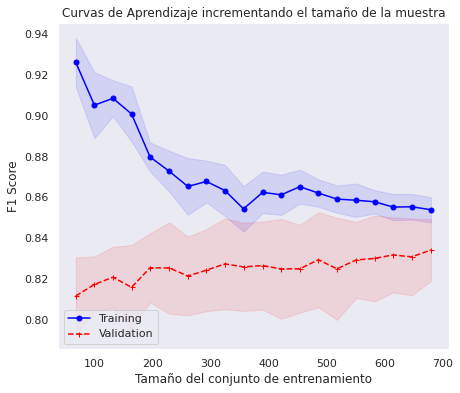

In [33]:
delta_train_sz = np.linspace(0.1, 1.0, num=20)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipes[1] ,    
                                                        X = X_train,
                                                        y = y_train,
                                                        cv = kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring=make_scorer(mi_f1_score),
                                                        random_state=11)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'F1 Score')


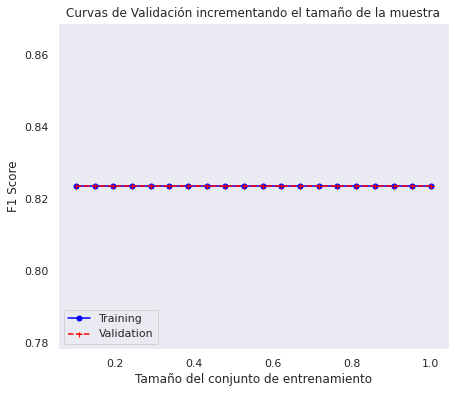

In [10]:
#pipes[2].get_params().keys()
train_scores, valid_scores = validation_curve( estimator = pipes[2],
   X=X_train, y=y_train, param_name="classifier__max_depth", param_range=delta_train_sz,
   scoring=make_scorer(mi_f1_score),
  cv=kfold)
mi_ValidationCurvePlot(delta_train_sz, train_scores, valid_scores,'F1 Score')

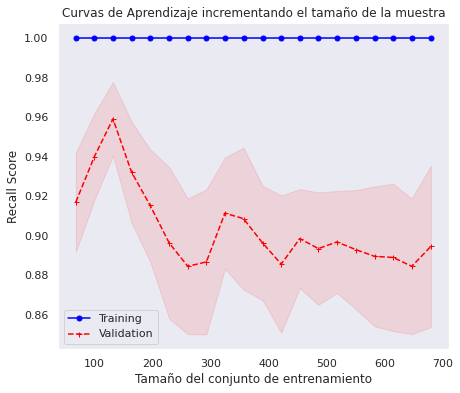

In [11]:

delta_train_sz = np.linspace(0.1, 1.0, num=20)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipes[0] ,    
                                                        X = X_train,
                                                        y = y_train,
                                                        cv = kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring=make_scorer(mi_recall),
                                                        random_state=11)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,'Recall Score')

#**Ejercicio-5.**

In [22]:
modelo_CV = LogisticRegression(max_iter=9000, random_state=1) 
mi_pipeCV = Pipeline(steps=[("PreparaInfo", Col_Trans),("model", modelo_CV)]) #model es solo un tag
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

#Probar con valores
parametroC= [0.01, 0.1, 1, 10, 100, 1000]

#Generar9 lista de parametros a utilizar con la funcion GridSearch

ParametrosGR = [{'model__penalty': ['l1'], 'model__solver': [ 'saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC},
                  {'model__penalty': ['l2'], 'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC},
                  {'model__penalty': ['elasticnet'], 'model__solver': ['saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC, 'model__l1_ratio': [0.5]},
                 ]
#Ahora definimos el modelo con el cual despues alimentaremos el pipeline par GridSearch

gridFinal=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParametrosGR,
                            scoring = 'f1', #Piden utilizar f1 score, por eso lo ponemos como scoring
                            cv = mi_kfoldCV)
  
gridFinal.fit(X_train, np.ravel(y_train))
best_score = gridFinal.best_score_
best_param = gridFinal.best_params_
print("El mejor escor es:", best_score)
print("El mejor parametro es:", best_param)


El mejor escor es: 0.8384307926132926
El mejor parametro es: {'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'sag'}


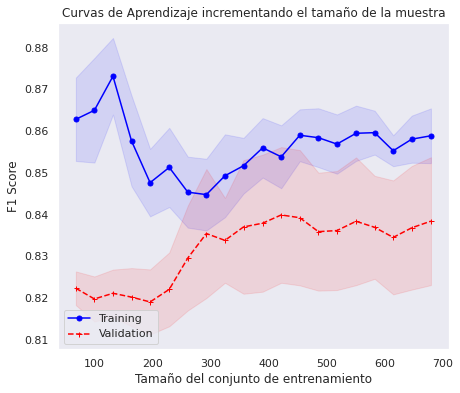

In [34]:
#Ejercicio 5 b

#Definir la funcion para la grafica de la curva de aprendizaje

def graf_CV (X_entrada, parametro_C, penalizacion, resolutor):
  modelo_CV = LogisticRegression(C=parametro_C, solver=resolutor, penalty=penalizacion, max_iter=8000, random_state=1)
  pipe_CV = Pipeline(steps=[("PreparaInfo", Col_Trans),("RegresionLogistica", modelo_CV)])
  kfold_CV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
  train_size_CV = np.linspace(0.1, 1.0, 20) #Incrementar el conjunto de entrenamiento al menos 20 veces
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipe_CV ,    
                                                        X = X_entrada,
                                                        y = y_train,
                                                        cv = kfold_CV ,
                                                        train_sizes = train_size_CV ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_f1_score))

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'F1 Score')

graf_CV(X_train, 0.1,'l2','sag')

In [37]:
#  Ejercicio 5 c

#Usar casi todo lo del GridSearch, cambiar parametros

modelo_CV = DecisionTreeClassifier() #Definir decision tree
mi_pipeCV = Pipeline(steps=[("PreparaInfo", Col_Trans),("model", modelo_CV)]) #model es solo un tag
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

ParametrosGR = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],  
              'model__criterion': ['gini', 'entropy'], 
              'model__max_depth':[2, 4, 6, 8, 10, 12], 
              'model__min_samples_split':[2, 4, 6,8,10], 
              'model__class_weight': ['balanced', None]}

ArbolFinal=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParametrosGR,
                            scoring = make_scorer(mi_precision),
                            cv = mi_kfoldCV)
ArbolFinal.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('PreparaInfo',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numericas',
                                                                         Pipeline(steps=[('impMean',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2)))]),
                                                                         ['duration',
                                   

In [38]:
#Imprimir mejores
best_score = ArbolFinal.best_score_
best_param = ArbolFinal.best_params_
print("El mejor escor es:", best_score)
print("El mejor parametro es:", best_param)

El mejor escor es: 0.859545140704498
El mejor parametro es: {'model__ccp_alpha': 0.01, 'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}


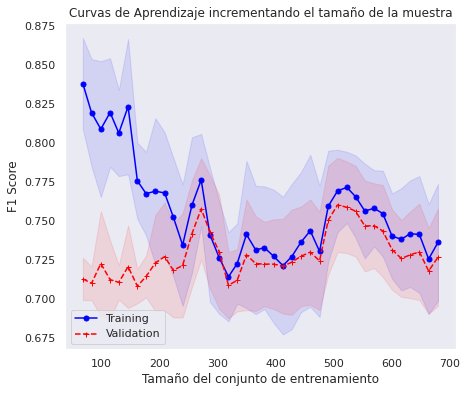

In [40]:
#Ejercicio 5 d
'''Con los mejores valores de los hiperparámetros encontrados con la métrica “precision”
para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve),
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y
evitar el sobreentrenamiento o el subentrenamiento.'''

#Usar funcion de arbol y ajustar parametros
def mi_curvaRF(X_entrada2): 
  modeloDT2 = DecisionTreeClassifier(ccp_alpha=ArbolFinal.best_params_.get('model__ccp_alpha'),
                                     criterion=ArbolFinal.best_params_.get('model__criterion'),
                                     max_depth=ArbolFinal.best_params_.get('model__max_depth'),
                                     min_samples_split=ArbolFinal.best_params_.get('model__min_samples_split')) 
 
  mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("ModeloDecisionTree", modeloDT2)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
  delta_train_sz = np.linspace(.1, 1, 40) #Definir 20 puntos enla partición, con 20 valores entre el .1 y el  1
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = X_entrada2,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_precision))
  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'F1 Score') 
mi_curvaRF(X_train)


In [41]:
#Ejercicio 5 e

# utilizar el GridCV

modelo_CV = RandomForestClassifier() # bosque aleatorio
mi_pipeCV = Pipeline(steps=[("PreparaInfo", Col_Trans),("model", modelo_CV)])
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

ParametrosGRRF = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],
              'model__criterion': ['gini', 'entropy'],
              'model__max_depth':[2, 4, 6, 8, 10, 12],
              'model__min_samples_split':[2, 4, 6,8,10],
              'model__class_weight': ['balanced', None]}

BosqueFinal=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParametrosGRRF,
                            scoring = make_scorer(mi_recall),
                            cv = mi_kfoldCV)

BosqueFinal.fit(X_train, np.ravel(y_train))

KeyboardInterrupt: ignored

In [ ]:
#Imprimir los mejores valores
print("best_score:", BosqueFinal.best_score_)
print("best_param:", BosqueFinal.best_params_)

In [ ]:
#Ejercicio 5 f

modeloRF = RandomForestClassifier(ccp_alpha=BosqueFinal.best_params_.get('model__ccp_alpha'),
                                 criterion=BosqueFinal.best_params_.get('model__criterion'),
                                 max_depth=10, ##Pide al menos 10 BosqueFinal.best_params_.get('model__max_depth'),
                                 min_samples_split=BosqueFinal.best_params_.get('model__min_samples_split')) 

mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("ModeloRandomForest", modeloRF)])
mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) 
delta_train_sz = np.linspace(1,20,20, dtype=int) 


tr_scores, val_scores = validation_curve(n_jobs = 2, 
                                  estimator = mi_pipe, 
                                  X = X_train,
                                  y = np.ravel(y_train),
                                  param_name = f"ModeloRandomForest__max_depth", 
                                  param_range = delta_train_sz,
                                  cv = mi_kfold, 
                                  scoring = 'recall')

mi_LearningCurvePlot(delta_train_sz, tr_scores, val_scores, 'F1 Score')

#**Ejercicio-6.**

In [13]:
#6a

estimador_optimo = gridFinal.best_estimator_
predicciones = estimador_optimo.predict(X_val)
print("Métrica f1-score: %.3f \n" %(mi_f1score(y_val, predicciones)))



In [13]:
# 6b

estimador_optimo = ArbolFinal.best_estimator_

predicciones = estimador_optimo.predict(X_val)
print("Métrica f1-score: %.3f \n" %(mi_f1score(y_val, predicciones)))

tree.plot_tree(estimador_optimo.named_steps["model"], filled = True)


###**Fin de la Actividad de la semana 6.**